## **PR1 TF4012 - PENGUKURAN BERBASIS CITRA**

Nama : Muhammad Akbar Nugrahadi

NIM : 13320011

Library yang digunakan : opencv, numpy, matplotlib.

### SOAL 1 : Image Blending dan Pengukuran Jarak

In [2]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt


Mengimport gambar-gambar yang diperlukan mengunakaan _**opencv library**_. Karena opencv membaca gambar dengan urutan channel BGR, maka perlu ditransformasi agar menjadi RGB sebagai berikut

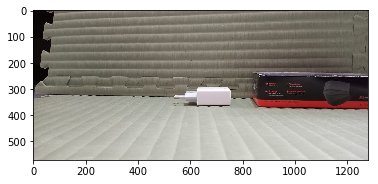

In [3]:
pos1 = cv2.imread("./1-Pos1.jpg")
pos2 = cv2.imread("./1-Pos2.jpg")
pos3 = cv2.imread("./1-Pos3.jpg")

#Transform collor channel BGR->RGB
pos1 = cv2.cvtColor(pos1,cv2.COLOR_RGB2BGR)
pos2 = cv2.cvtColor(pos2,cv2.COLOR_RGB2BGR)
pos3 = cv2.cvtColor(pos3,cv2.COLOR_RGB2BGR)
plt.imshow(pos1)




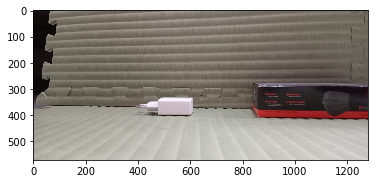

In [4]:
plt.imshow(pos2)


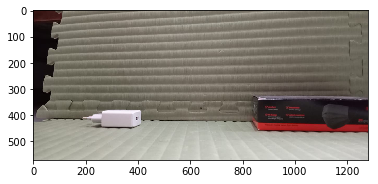

In [5]:
plt.imshow(pos3)


**Blending Images**

Untuk melakukan _blending_, maka dilakukan dengan menggunakan fungsi _addWeighted_.
Berikut persamaan fungsi tersebut :

$$
 blended image = \alpha \times imgsrc1 + \beta \times imgsrc2 + \gamma
$$

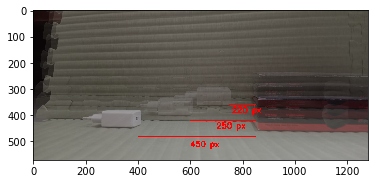

In [6]:
pos1to2 = cv2.addWeighted(pos1,0.4,pos2, 0.4,0)
pos1to3 = cv2.addWeighted(pos1to2,0.4, pos3,0.4,0)

#Jarak posisi 1 dengan start
cv2.putText(pos1to3,"220 px",org=(760,390),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale = 1, color =(255,0,0),thickness = 3)
cv2.line(pos1to3, pt1 = (750,360), pt2 = (850,360),color = (255,0,0), thickness = 2)

#Jarak posisi 2 dengan start
cv2.putText(pos1to3,"250 px",org=(700,450),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale = 1, color =(255,0,0),thickness = 3)
cv2.line(pos1to3, pt1 = (600,420), pt2 = (850,420),color = (255,0,0), thickness = 2)


#Jarak posisi 3 dengan start
cv2.putText(pos1to3,"450 px",org=(600,520),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale = 1, color =(255,0,0),thickness = 3)
cv2.line(pos1to3, pt1 = (400,480), pt2 = (850,480),color = (255,0,0), thickness = 2)

plt.imshow(pos1to3)

### SOAL 2 : MENGUKUR LUAS DAN KELILING OBJEK

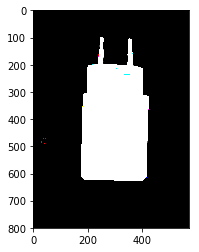

In [48]:
img1 = cv2.imread("./2-ChargerShapeSize.jpg")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

#CROP IMAGE for FOCUS TO THE OBJECT
crop_img = img1[200:1000,:]

#plt.imshow(crop_img)

#THRESHOLD
# Set threshold and maxValue
thresh = 100
maxValue = 255
 
# Basic threshold example
ret,tres = cv2.threshold(crop_img, thresh, maxValue, cv2.THRESH_BINARY)

plt.imshow(tres)

#tres.shape

In [59]:
tres.shape
tres[500,250]
len(tres[0,0]) #ukuran array ke3 (channel) yang berarti ada 3 channel(RGB)

3

**LUAS OBJEK**

Dengan melakukan thresholding biner, maka terdapat dua macam nilai : 0 (hitam) dan 255 (putih). Karena objek berwarna putih, maka dilakukan pencarian elemen array atau objek yang memiliki nilai 255. Kemudian, komplemen tersebut dijumlahkan untuk menjadi luas objek yang dicitrakan.

In [64]:
area = 0
for i in range(800):
    for j in range(571):
        for l in range(3):
            if tres[i,j,l] > 0:
                area = area +1
            else :
                area = area + 0
print("Luas Objek : %d" %area ,"px ")

Luas Objek : 304635  px 


**KELILING OBJEK**

Dengan melakukan thresholding biner, maka terdapat dua macam nilai : 0 (hitam) dan 255 (putih). Kemudian, dilakukan filtering menggunakan dua macam filter untuk dibandingkan (MedianBlur dan Gaussian Blur). Hasil filtering lalu dijadikan dasar untuk melakukan edge detection.

Kali ini akan digunakan metode Sobel Edge Detection. Setelah itu, gambar hasil pengolahan edge detection kemudian dicari tiap elemennya, jika elemen tersebut bernilai ada (lebih dari 0) maka elemen tersebut dijumlahkan untuk menjadi keliiling objek yang dicitrakan.

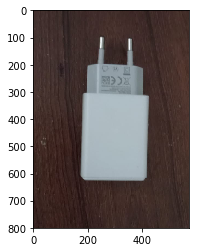

In [66]:
img2 = cv2.imread("./2-ChargerShapeSize.jpg")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

#CROP IMAGE for FOCUS TO THE OBJECT
crop_img2 = img2[200:1000,:]
plt.imshow(crop_img2)

**Filtering dengan Median Blur**

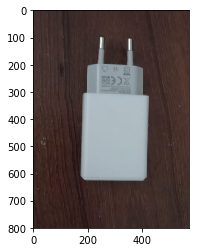

In [104]:
img2_gray = cv2.cvtColor(crop_img2, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_mblur = cv2.medianBlur(crop_img2, 3) 
 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_mblur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_mblur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_mblur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

plt.imshow(img_mblur)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


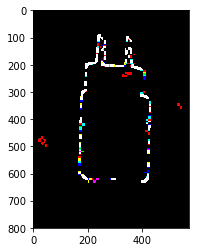

In [109]:
ret2,tres2 = cv2.threshold(img_mblur, thresh, maxValue, cv2.THRESH_BINARY)
sobelx2 = cv2.Sobel(src=tres2, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=19) # Sobel Edge Detection on the X axis

plt.imshow(sobelx2)

In [110]:
keliling = 0
for i in range(800):
    for j in range(571):
        for l in range(3):
            if sobelx2[i,j,l] > 0:
                keliling = keliling +1
            else :
                keliling = keliling + 0
print("Keliling Objek : %d" %keliling ,"px ")

Keliling Objek : 31879 px 


**Filtering dengan Gaussian Blur**

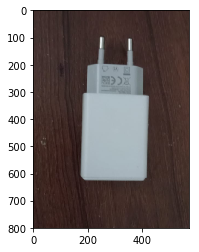

In [107]:
#CROP IMAGE for FOCUS TO THE OBJECT
crop_img2 = img2[200:1000,:]
img2_gray = cv2.cvtColor(crop_img2, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_gblur = cv2.GaussianBlur(crop_img2, (3,3), 0) 
 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_gblur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_gblur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_gblur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

plt.imshow(img_gblur)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


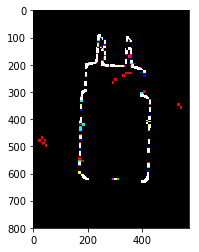

In [108]:
ret3,tres3 = cv2.threshold(img_gblur, thresh, maxValue, cv2.THRESH_BINARY)
sobelx3 = cv2.Sobel(src=tres3, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=19) # Sobel Edge Detection on the X axis

plt.imshow(sobelx3)

In [111]:
kelilingGaus = 0
for i in range(800):
    for j in range(571):
        for l in range(3):
            if sobelx3[i,j,l] > 0:
                kelilingGaus = kelilingGaus +1
            else :
                kelilingGaus = kelilingGaus + 0
print("Keliling Objek : %d" %kelilingGaus ,"px ")

Keliling Objek : 31398 px 


**KOMENTAR**

Perhitungan menggunakan Filter Gaussian Blur untuk keliling menghasilkan angka yang lebih kecil dibanding Median Blurr. Hal ini dimungkingkan karena filterisasi menggunakan Gaussian Blur lebih *smooth* sehingga lebih banyak informasi yang dilebur. Alasan ini sesuai dengan konsep filterisasi Gaussian Blur.